# Credit Card Fradu Detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
dataset_path = "creditcard.csv"

df = pd.read_csv(dataset_path)

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
dataset_arr= df.to_numpy()
X,y = dataset_arr[:,:-1].astype(np.float64), dataset_arr[:,-1].astype(np.uint8)


In [7]:
intercept = np.ones((X.shape[0],1))

X_b = np.hstack((intercept,X))

In [8]:
n_classes = np.unique(y).shape[0]
n_samples = y.shape[0]

y_encoded = np.array(
    [np.zeros(n_classes) for _ in range(n_samples)]
)
y_encoded[np.arange(n_samples),y] = 1


In [9]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True
X_train, X_val, y_train,y_val = train_test_split(
    X_b, y_encoded,
    test_size = val_size,
    random_state=random_state,
    shuffle=is_shuffle
)
X_train, X_test,y_train,y_test = train_test_split(
    X_train,y_train,
    test_size = test_size,
    random_state = random_state,
    shuffle=is_shuffle
)

In [10]:
normalizer = StandardScaler()
X_train[:,1:] = normalizer.fit_transform(X_train[:,1:])
X_val[:,1:] = normalizer.transform(X_val[:,1:])
X_test[:,1:] = normalizer.transform(X_test[:,1:])

In [11]:
def softmax(z):
  exp_z = np.exp(z)
  return exp_z / exp_z.sum(axis=1)[:,None]
def predict(X,theta):
  z = np.dot(X,theta)
  y_hat = softmax(z)
  return y_hat
def compute_loss(y_hat,y):
  return (-1/y.size) * np.sum(y*np.log(y_hat))
def compute_gradient(X,y,y_hat):
  return np.dot(X.T,(y_hat-y))/y.size
def update_theta(theta,gradient,lr):
  return theta - lr*gradient
def compute_accuracy(X,y,theta):
  y_hat = predict(X,theta)
  acc = (np.argmax(y_hat,axis=1)==np.argmax(y,axis=1)).mean()
  return acc

In [12]:
lr = 0.01
epochs = 30
batch_size = 1024
n_features = X_train.shape[1]
np.random.seed(random_state)
theta = np.random.uniform(size=(n_features,n_classes))


In [13]:
softmax(np.array([[10],[20]]))

array([[1.],
       [1.]])

In [14]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
  train_batch_losses = []
  train_batch_accs = []
  val_batch_losses = []
  val_batch_accs = []
  for i in range(0,X_train.shape[0],batch_size):
    X_i = X_train[i:i+batch_size]
    y_i = y_train[i:i+batch_size]
    y_hat = predict(X_i,theta)
    train_loss = compute_loss(y_hat,y_i)

    gradient = compute_gradient(X_i,y_i,y_hat)

    theta = update_theta(theta,gradient,lr)

    train_batch_losses.append(train_loss)

    train_acc = compute_accuracy(X_train,y_train,theta)
    train_batch_accs.append(train_acc)

    y_val_hat = predict(X_val,theta)
    val_loss = compute_loss(y_val_hat,y_val)
    val_batch_losses.append(val_loss)

    val_acc = compute_accuracy(X_val,y_val,theta)
    val_batch_accs.append(val_acc)

  n = len(train_batch_losses)
  train_batch_loss = sum(train_batch_losses)/n
  val_batch_loss = sum(val_batch_losses)/n
  train_batch_acc = sum(train_batch_accs)/n
  val_batch_acc = sum(val_batch_accs)/n

  train_losses.append(train_batch_loss)
  val_losses.append(val_batch_loss)
  train_accs.append(train_batch_acc)
  val_accs.append(val_batch_acc)

  print(f"\nEPOCH {epoch+1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}")


EPOCH 1:	Training loss: 0.300	Validation loss: 0.297

EPOCH 2:	Training loss: 0.176	Validation loss: 0.174

EPOCH 3:	Training loss: 0.115	Validation loss: 0.113

EPOCH 4:	Training loss: 0.081	Validation loss: 0.080

EPOCH 5:	Training loss: 0.062	Validation loss: 0.061

EPOCH 6:	Training loss: 0.049	Validation loss: 0.049

EPOCH 7:	Training loss: 0.041	Validation loss: 0.041

EPOCH 8:	Training loss: 0.035	Validation loss: 0.035

EPOCH 9:	Training loss: 0.031	Validation loss: 0.031

EPOCH 10:	Training loss: 0.028	Validation loss: 0.027

EPOCH 11:	Training loss: 0.025	Validation loss: 0.025

EPOCH 12:	Training loss: 0.023	Validation loss: 0.023

EPOCH 13:	Training loss: 0.021	Validation loss: 0.021

EPOCH 14:	Training loss: 0.020	Validation loss: 0.020

EPOCH 15:	Training loss: 0.019	Validation loss: 0.018

EPOCH 16:	Training loss: 0.017	Validation loss: 0.017

EPOCH 17:	Training loss: 0.017	Validation loss: 0.016

EPOCH 18:	Training loss: 0.016	Validation loss: 0.015

EPOCH 19:	Training

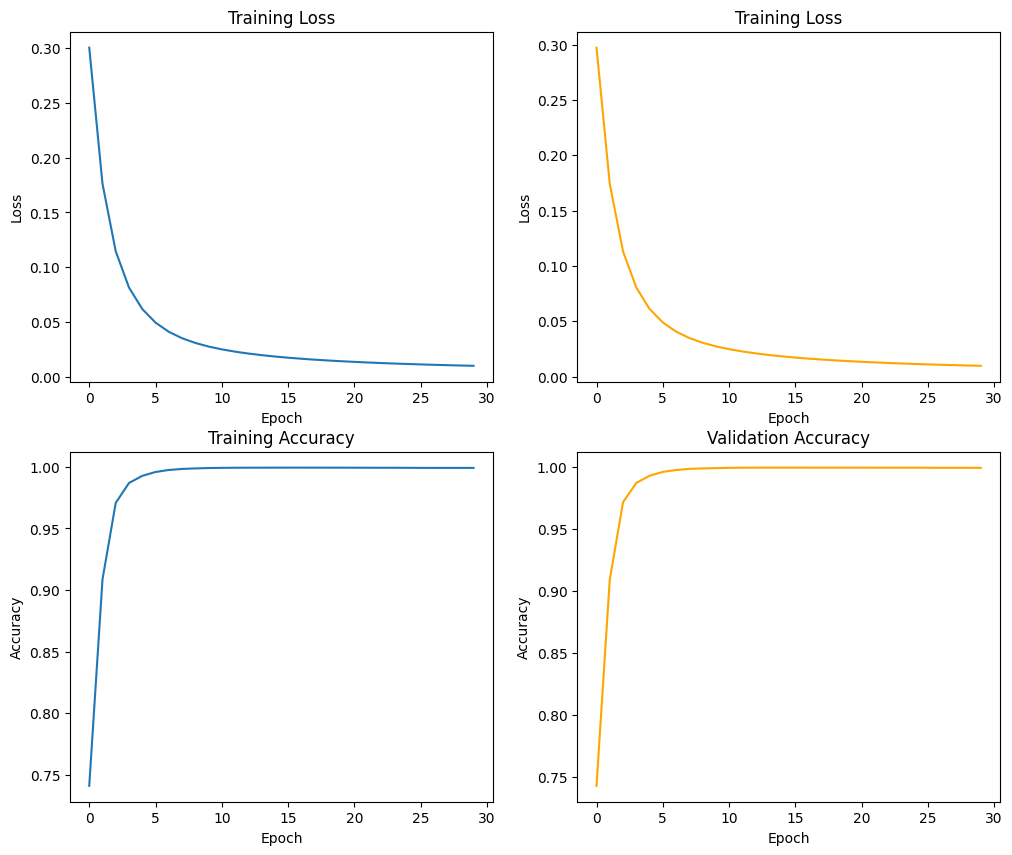

In [15]:
fig,ax = plt.subplots(2,2,figsize=(12,10))
ax[0,0].plot(train_losses)
ax[0,0].set(xlabel="Epoch",ylabel="Loss")
ax[0,0].set_title("Training Loss")

ax[0,1].plot(val_losses,"orange")
ax[0,1].set(xlabel="Epoch",ylabel="Loss")
ax[0,1].set_title("Training Loss")

ax[1,0].plot(train_accs)
ax[1,0].set(xlabel="Epoch",ylabel="Accuracy")
ax[1,0].set_title("Training Accuracy")

ax[1,1].plot(val_accs,"orange")
ax[1,1].set(xlabel="Epoch",ylabel="Accuracy")
ax[1,1].set_title("Validation Accuracy")
plt.show()

In [16]:
val_set_acc = compute_accuracy(X_val,y_val,theta)
test_set_acc = compute_accuracy(X_test,y_test,theta)
print(f"Validation Set Accuracy: {val_set_acc:.3f}")
print(f"Test Set Accuracy: {test_set_acc:.3f}")

Validation Set Accuracy: 0.999
Test Set Accuracy: 0.999


# Twitter Sentiment Analysis

Import library
<hr>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
nltk.download("stopwords")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Import dataset
<hr>

In [18]:
dataset_path = "Twitter_Data.csv"

df = pd.read_csv(
    dataset_path
)
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [19]:
# drop empty samples
df = df.dropna()

preprocessing
<hr>

In [20]:
def text_normalize(text):
  # Lowercasing
  text = text.lower()
  # Retweet old acronym "RT" removal
  text = re.sub(r'^rt[\s]+',"",text)

  # Hyperlinks removal
  text = re.sub(r'https?:\/\/.*[\r\n]*',"",text)


  # Punctuation removal
  text = re.sub(r'[^\w\s]',"",text)

  # Remove stopwords
  stop_words = set(stopwords.words("english"))

  words = text.split()
  words = [word for word in words if word not in stop_words]
  text = " ".join(words)

  # Stemming
  stemmer = SnowballStemmer("english")
  words = text.split()
  words = [stemmer.stem(word) for word in words]
  text = " ".join(words)

  return text

Vectorization
<hr>

In [21]:
vectorizer = TfidfVectorizer(max_features=2000)
X = vectorizer.fit_transform(df['clean_text']).toarray()


In [22]:
intercept = np.ones((X.shape[0],1))

X_b = np.hstack((intercept,X))
X_b

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [23]:
n_classes = df['category'].nunique()
n_samples = df['category'].size

y = df['category'].to_numpy()+1
y = y.astype(np.uint8)
y_encoded = np.array(
    [np.zeros(n_classes) for _ in range(n_samples)]
)
y_encoded[np.arange(n_samples),y] = 1

Split dataset
<hr>

In [24]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True
X_train, X_val, y_train,y_val = train_test_split(
    X_b, y_encoded,
    test_size = val_size,
    random_state=random_state,
    shuffle=is_shuffle
)
X_train, X_test,y_train,y_test = train_test_split(
    X_train,y_train,
    test_size = test_size,
    random_state = random_state,
    shuffle=is_shuffle
)

In [25]:
def softmax(z):
  exp_z = np.exp(z)
  return exp_z / exp_z.sum(axis=1)[:,None]
def predict(X,theta):
  z = np.dot(X,theta)
  y_hat = softmax(z)
  return y_hat
def compute_loss(y_hat,y):
  return (-1/y.size) * np.sum(y*np.log(y_hat))
def compute_gradient(X,y,y_hat):
  return np.dot(X.T,(y_hat-y))/y.size
def update_theta(theta,gradient,lr):
  return theta - lr*gradient
def compute_accuracy(X,y,theta):
  y_hat = predict(X,theta)
  acc = (np.argmax(y_hat,axis=1)==np.argmax(y,axis=1)).mean()
  return acc

Training
<hr>

In [26]:
lr = 0.01
epochs = 30
batch_size = 1024
n_features = X_train.shape[1]
np.random.seed(random_state)
theta = np.random.uniform(size=(n_features,n_classes))


In [27]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
  train_batch_losses = []
  train_batch_accs = []
  val_batch_losses = []
  val_batch_accs = []
  for i in range(0,X_train.shape[0],batch_size):
    X_i = X_train[i:i+batch_size]
    y_i = y_train[i:i+batch_size]
    y_hat = predict(X_i,theta)
    train_loss = compute_loss(y_hat,y_i)

    gradient = compute_gradient(X_i,y_i,y_hat)

    theta = update_theta(theta,gradient,lr)

    train_batch_losses.append(train_loss)

    train_acc = compute_accuracy(X_train,y_train,theta)
    train_batch_accs.append(train_acc)

    y_val_hat = predict(X_val,theta)
    val_loss = compute_loss(y_val_hat,y_val)
    val_batch_losses.append(val_loss)

    val_acc = compute_accuracy(X_val,y_val,theta)
    val_batch_accs.append(val_acc)

  n = len(train_batch_losses)
  train_batch_loss = sum(train_batch_losses)/n
  val_batch_loss = sum(val_batch_losses)/n
  train_batch_acc = sum(train_batch_accs)/n
  val_batch_acc = sum(val_batch_accs)/n

  train_losses.append(train_batch_loss)
  val_losses.append(val_batch_loss)
  train_accs.append(train_batch_acc)
  val_accs.append(val_batch_acc)

  print(f"\nEPOCH {epoch+1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}")


EPOCH 1:	Training loss: 0.375	Validation loss: 0.375

EPOCH 2:	Training loss: 0.372	Validation loss: 0.372

EPOCH 3:	Training loss: 0.370	Validation loss: 0.369

EPOCH 4:	Training loss: 0.368	Validation loss: 0.367

EPOCH 5:	Training loss: 0.366	Validation loss: 0.366

EPOCH 6:	Training loss: 0.365	Validation loss: 0.364

EPOCH 7:	Training loss: 0.364	Validation loss: 0.363

EPOCH 8:	Training loss: 0.363	Validation loss: 0.362

EPOCH 9:	Training loss: 0.362	Validation loss: 0.362

EPOCH 10:	Training loss: 0.362	Validation loss: 0.361

EPOCH 11:	Training loss: 0.361	Validation loss: 0.360

EPOCH 12:	Training loss: 0.361	Validation loss: 0.360

EPOCH 13:	Training loss: 0.360	Validation loss: 0.360

EPOCH 14:	Training loss: 0.360	Validation loss: 0.359

EPOCH 15:	Training loss: 0.360	Validation loss: 0.359

EPOCH 16:	Training loss: 0.360	Validation loss: 0.359

EPOCH 17:	Training loss: 0.360	Validation loss: 0.359

EPOCH 18:	Training loss: 0.359	Validation loss: 0.359

EPOCH 19:	Training

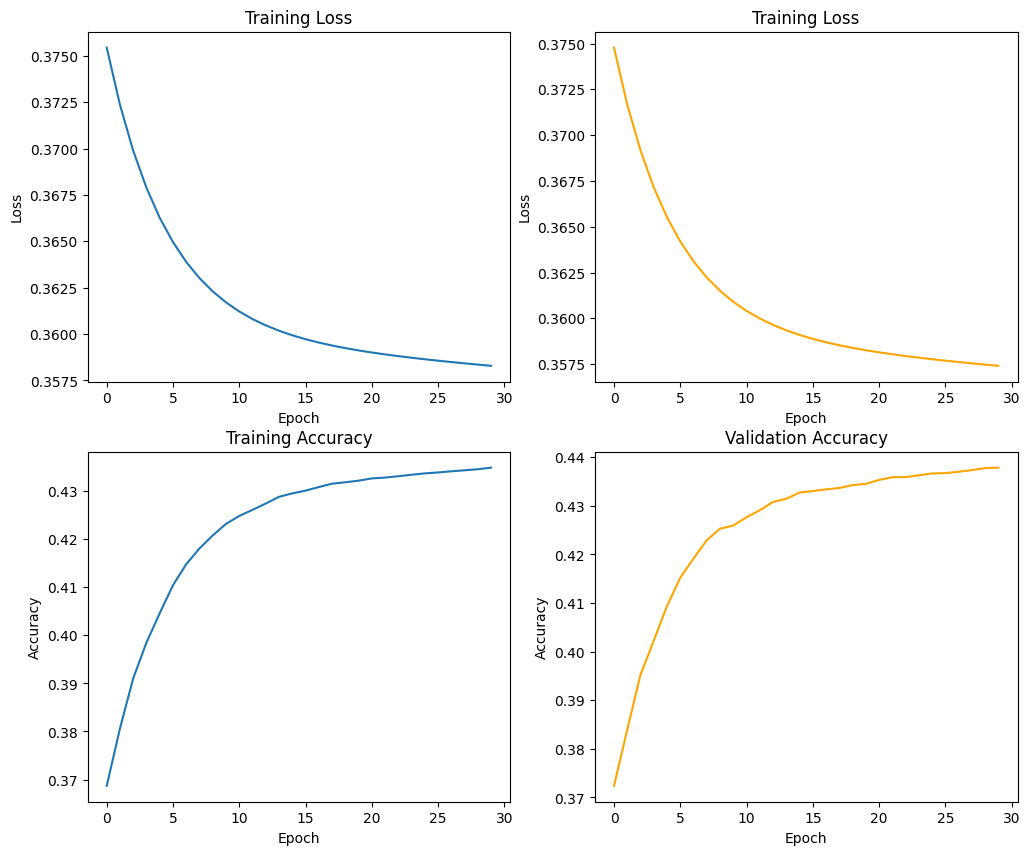

In [28]:
fig,ax = plt.subplots(2,2,figsize=(12,10))
ax[0,0].plot(train_losses)
ax[0,0].set(xlabel="Epoch",ylabel="Loss")
ax[0,0].set_title("Training Loss")

ax[0,1].plot(val_losses,"orange")
ax[0,1].set(xlabel="Epoch",ylabel="Loss")
ax[0,1].set_title("Training Loss")

ax[1,0].plot(train_accs)
ax[1,0].set(xlabel="Epoch",ylabel="Accuracy")
ax[1,0].set_title("Training Accuracy")

ax[1,1].plot(val_accs,"orange")
ax[1,1].set(xlabel="Epoch",ylabel="Accuracy")
ax[1,1].set_title("Validation Accuracy")
plt.show()

In [29]:
val_set_acc = compute_accuracy(X_val,y_val,theta)
test_set_acc = compute_accuracy(X_test,y_test,theta)
print(f"Validation Set Accuracy: {val_set_acc:.3f}")
print(f"Test Set Accuracy: {test_set_acc:.3f}")

Validation Set Accuracy: 0.438
Test Set Accuracy: 0.436
